<a href="https://colab.research.google.com/github/radhakrishnan-omotec/ndvi-repo/blob/main/NDVI_Project-1-SurajSharma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# Change to the desired folder path in your Google Drive
folder_path = '/content/drive/MyDrive/NDVI (Normalized Difference Vegetation Index) Project'
os.chdir(folder_path)


In [ ]:
!git clone https://github.com/radhakrishnan-omotec/ndvi-repo.git



Cloning into 'ndvi-repo'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 11 (delta 0), reused 5 (delta 0), pack-reused 0
Receiving objects: 100% (11/11), 1.34 MiB | 8.10 MiB/s, done.


#**Project Introduction**

**Download EarthPY Library:**



In [ ]:
!pip install earthpy

# Python package developed to simplify the process of working with spatial data in Earth science and geospatial analysis. EarthPy is built on top of the widely used scientific Python libraries like NumPy, Matplotlib, and rasterio, and it provides easy-to-use functions and methods to analyze and visualize geospatial data.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 69.7 MB/s eta 0:00:00


Rasterio is a Python library used for reading and writing geospatial raster data. It provides a simple and efficient way to work with raster datasets, which are commonly used in Earth science, remote sensing, and geospatial analysis. Rasterio builds on top of the GDAL (Geospatial Data Abstraction Library) and Python's NumPy, making it a powerful tool for processing and analyzing geospatial data.

Reading and Writing Raster Data: Rasterio can open and read various raster data formats, such as GeoTIFF, JPEG, PNG, and more. It allows users to access raster data as NumPy arrays, making it easy to perform data manipulation and analysis.

A raster dataset is a type of geospatial data representation that divides the Earth's surface into a grid of cells or pixels. Each pixel in the raster grid represents a value, such as elevation, temperature, land cover type, or any other attribute of interest. Raster datasets are widely used in various Earth science and geospatial applications due to their ability to represent continuous and discrete phenomena over a spatial area.

Key characteristics of raster datasets:

Spatial Extent: A raster dataset covers a specific spatial extent, which defines the geographic region represented by the raster. The extent is defined by the coordinates of the top-left and bottom-right corners of the raster grid.

Resolution: The resolution of a raster dataset refers to the size of each pixel in the raster grid. It determines the level of detail or precision with which data is represented. Higher resolution means smaller pixel size and finer detail.

Coordinate Reference System (CRS): Raster datasets are georeferenced, meaning they are tied to a specific coordinate reference system (CRS). The CRS defines the spatial reference and units used to represent locations on the Earth's surface.

Data Values: Each pixel in the raster grid contains a data value representing the attribute of interest. For example, in an elevation raster, each pixel stores the elevation value for that location.

**Importing the Libraries:**

In [ ]:
import os
# The os module is a standard Python library that provides a way to interact with the operating system. In this code snippet, os is likely used to perform operations related to file and directory handling, such as listing files in a directory or changing the current working directory.
from glob import glob
# The glob function is used for finding file pathnames that match a specified pattern. It is often used for file searching and handling multiple files with similar names.
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# ListedColormap is a class from the matplotlib.colors module that represents a discrete colormap. It is used for creating custom colormaps when visualizing data.
import earthpy as et
# earthpy is a Python package designed for working with geospatial data in Earth science and geospatial analysis. It provides functions and classes to read, manipulate, and visualize geospatial data. In this code snippet, the earthpy package is likely used for specific geospatial tasks.
import earthpy.spatial as es
# earthpy.spatial is a sub-module of the earthpy package that contains functions related to spatial analysis of geospatial data. It provides tools for cropping, clipping, and resampling raster datasets, among other spatial operations.
import earthpy.plot as ep
# earthpy.plot is another sub-module of the earthpy package that focuses on geospatial data visualization. It provides functions and tools to create various types of plots and maps for geospatial datasets.

- A raster dataset is like a big grid of these pixels. Each pixel in the grid holds a value that represents something about the area it covers. This value could stand for things like temperature, elevation, vegetation type, or any other information you want to know about a location on the Earth's surface.

- Think of it as if you were looking down on a map from an airplane. Instead of seeing streets and landmarks, you see a grid of colored squares, each square representing a specific piece of information about the land below.

- So, in simple terms, a raster dataset is a way of organizing and storing data about different attributes of the Earth's surface using a grid of tiny squares, kind of like a digital map made up of colorful pixels.

- A TIF image, also known as a TIFF image, stands for Tagged Image File Format. It is a popular and widely used file format for storing and exchanging raster graphics images. TIF images can contain both bitmap and vector images, and they can support a variety of color depths, compression methods, and metadata.

Here are some key features and characteristics of TIF images:

- Raster Format: TIF images are primarily used to store raster graphics, which means they are composed of a grid of individual pixels. Each pixel in the grid has a specific color value, which collectively forms the image.

- Lossless Compression: TIF images typically use lossless compression, which means that they can be compressed without any loss of image quality. This makes TIF images suitable for storing high-quality images without sacrificing visual fidelity.

- Color Depth: TIF images can support various color depths, including grayscale, RGB (Red-Green-Blue), and CMYK (Cyan-Magenta-Yellow-Black). This flexibility allows TIF images to represent a wide range of colors and tones.

- Metadata: TIF files can store a variety of metadata, including information about the image, such as author, copyright, creation date, and more. This metadata is stored in a tag structure within the file.

- Layer Support: TIF files can also support layers, making them suitable for applications that require multiple layers of image data, such as image editing software.

- Platform Independence: TIF files are designed to be platform-independent, meaning they can be read and written by different software applications on various operating systems.

- Widely Supported: TIF is a widely supported file format, and many image editing, graphic design, and GIS (Geographic Information Systems) software can open, manipulate, and save TIF images.





Get data and set your home working directory.

**Band Details:**

- BAND 1 - Blue
- BAND 2 - Green
- BAND 3 - Red
- BAND 4 - Redex
- BAND 5 - Near IR

Creation of my own data instead of landsat8 using rasterio library




PYTHON CODE FOR VARSHA DATA:

import rasterio

# Replace "your_data_path" with the path to your data
with rasterio.open("/content/ndvi-repo/Images/band-1") as dataset:
    data = dataset.read()

# Get data and set your home working directory
data = et.data.get_data("/content/ndvi-repo/Images/band-1")

<hr>

In [ ]:
# Get data and set your home working directory
data = et.data.get_data("vignette-landsat")
print(data)

# et: This is an alias for the earthpy package, which you imported earlier. It provides functions and tools for working with geospatial data.

# et.data: This part of the code accesses the data submodule within the earthpy package. This submodule contains functions for accessing example datasets provided by the earthpy package for learning and testing purposes.

# .get_data("vignette-landsat"): This is a function call that requests a specific dataset named "vignette-landsat" from the earthpy.data submodule. This function retrieves the dataset and returns it as a variable called data.

/root/earth-analytics/data/vignette-landsat/.


The specific contents of the "vignette-landsat" dataset can vary depending on the version of the earthpy package and the dataset's update status

- Landsat Imagery: The dataset may include multiple bands of Landsat satellite
imagery. Landsat satellites capture data in various spectral bands, such as red, green, blue, near-infrared, etc. These bands can be used for different types of analysis, including calculating NDVI for vegetation health assessment.

- Metadata: Metadata provides essential information about the imagery, such as acquisition date, sensor details, spatial resolution, and more. This information is crucial for accurate analysis and interpretation of the data.

- Mask Layers: The dataset might also include mask layers that indicate areas with clouds, shadows, or other types of interference. These mask layers help filter out undesirable data when performing analysis.

- Geospatial Information: The dataset may contain geospatial information like spatial extents, coordinate reference system (CRS), and spatial resolution. This information ensures that you can properly align and analyze the data geographically.

- Documentation and Tutorials: Along with the data, there may be documentation or tutorials that guide users on how to load, preprocess, visualize, and analyze the Landsat imagery using the earthpy package.





- os.chdir(os.path.join(et.io.HOME, "earth-analytics"))

- os.chdir: This is a function from the os module in Python. It stands for "change directory." It allows you to change the current working directory in your operating system's file system.

- os.path.join: This is a function from the os.path module in Python. It's used for constructing file and directory paths in a platform-independent way. It takes multiple path components as arguments and joins them using the appropriate directory separator for the current operating system.

- et.io.HOME: et refers to the earthpy package, and et.io is a sub-module within earthpy. et.io.HOME is a variable that represents the home directory of the Earth Analytics education platform. It points to a specific directory on your file system.

- "earth-analytics": This is a string that represents the name of the directory we want to navigate to within the home directory.

In [ ]:
os.chdir(os.path.join(et.io.HOME, "earth-analytics"))

# Stack the Landsat 8 bands
# This creates a numpy array with each "layer" representing a single band
landsat_path = glob(
    "data/vignette-landsat/LC08_L1TP_034032_20160621_20170221_01_T1_sr_band*_crop.tif"
)
landsat_path.sort()
arr_st, meta = es.stack(landsat_path, nodata=-9999)

print("stacked array, arr_st = ", arr_st)
print("meta data, meta = ", meta)
print("path of all the landsat images from vignette-landsat dataset in ascending order = ", landsat_path)

stacked array, arr_st =  [[[493 580 714 ... 842 785 723]
  [498 562 682 ... 851 804 725]
  [492 539 633 ... 870 818 730]
  ...
  [400 398 400 ... -- -- --]
  [432 389 402 ... -- -- --]
  [450 394 490 ... -- -- --]]

 [[597 710 867 ... 938 899 844]
  [624 699 845 ... 948 915 860]
  [611 646 771 ... 965 939 869]
  ...
  [553 558 556 ... -- -- --]
  [589 547 551 ... -- -- --]
  [624 537 676 ... -- -- --]]

 [[867 987 1180 ... 1235 1215 1193]
  [884 966 1127 ... 1235 1232 1214]
  [878 913 1046 ... 1257 1262 1234]
  ...
  [878 887 878 ... -- -- --]
  [911 867 874 ... -- -- --]
  [956 853 1041 ... -- -- --]]

 ...

 [[2577 2576 2425 ... 2959 2949 2985]
  [2524 2514 2326 ... 2912 2913 2928]
  [2523 2481 2358 ... 2872 2890 2900]
  ...
  [2652 2598 2456 ... -- -- --]
  [2632 2490 2348 ... -- -- --]
  [2608 2449 2353 ... -- -- --]]

 [[2095 2405 2598 ... 3715 3680 3582]
  [2178 2383 2720 ... 3729 3741 3612]
  [2089 2293 2589 ... 3797 3825 3626]
  ...
  [2322 2322 2316 ... -- -- --]
  [2426 2270 

- os.chdir(os.path.join(et.io.HOME, "earth-analytics")):

This line of code changes the current working directory to a specific path. The path is constructed by joining the user's home directory (et.io.HOME) with the subdirectory "earth-analytics."

- landsat_path = glob("data/vignette-landsat/LC08_L1TP_034032_20160621_20170221_01_T1_sr_band*_crop.tif"):

This line uses the glob function to search for files that match a specific pattern. It searches for files with names like "LC08_L1TP_034032_20160621_20170221_01_T1_sr_band*_crop.tif" within the "data/vignette-landsat" directory.
The asterisk * is a wildcard that matches any characters. So, it's looking for files with names that start with "LC08_L1TP_034032_20160621_20170221_01_T1_sr_band" and end with "_crop.tif."
The glob function returns a list of file paths that match the pattern.

- landsat_path.sort():

This line sorts the list of file paths obtained from the previous step in ascending order.

- arr_st, meta = es.stack(landsat_path, nodata=-9999):

This line uses the earthpy.spatial submodule to stack multiple raster files into a single numpy array (arr_st). Each file represents a different band of Landsat 8 imagery.
The stack function takes the list of file paths (landsat_path) and stacks the corresponding bands into a 3D numpy array. The nodata parameter is set to -9999, indicating that this value should be treated as NoData when stacking.
meta holds metadata information about the stacked array, including details about the spatial extent, CRS (Coordinate Reference System), resolution, etc.
Printing paths:

- The three print statements are used to display the stacked array (arr_st), metadata (meta), and the list of Landsat file paths (landsat_path).

Band 4 :
   - Landsat 8 red band is band 4 at "[3]"

Band 5:
   - Landsat 8 near-infrared band is band 5 at "[4]"

![Landsat 8 Band Table](https://landsat.gsfc.nasa.gov/wp-content/uploads/2021/12/BandpassesL7vL8_Jul20131-1024x611-1.jpg)


In [ ]:
# Landsat 8 red band is band 4 at [3]
# Landsat 8 near-infrared band is band 5 at [4]
ndvi = es.normalized_diff(arr_st[4], arr_st[3])

arr_st refers to a numpy array that contains stacked raster data from Landsat 8 imagery. Let's break down what arr_st contains and how the NDVI calculation is performed:

- arr_st: This numpy array is created by stacking multiple bands of Landsat 8 imagery. Each band represents a specific type of information captured by the satellite sensor. For example, band 3 might represent the red band, band 4 might represent the near-infrared band, and so on. The array is organized in such a way that each "layer" (or index) of the array corresponds to a different band of the imagery.

- es.normalized_diff(arr_st[4], arr_st[3]): This line of code calculates the Normalized Difference Vegetation Index (NDVI) using the red and near-infrared bands from the arr_st array.

- arr_st[4]: This refers to the near-infrared band. In Python indexing, [4] corresponds to the fifth layer of the arr_st array. The near-infrared band is sensitive to vegetation health and is used in the NDVI calculation.

- arr_st[3]: This refers to the red band. In Python indexing, [3] corresponds to the fourth layer of the arr_st array. The red band is also used in the NDVI calculation.

- es.normalized_diff(): This function is provided by the earthpy.spatial submodule. It calculates the NDVI by subtracting the red band values from the near-infrared band values and then dividing by their sum.

- The result of the NDVI calculation is stored in the variable ndvi, which will be a numpy array with NDVI values calculated for each pixel in the imagery. NDVI values typically range from -1 to 1, where higher values represent healthier and denser vegetation, lower values represent less healthy or sparse vegetation, and negative values can indicate non-vegetated areas (like water bodies).

In [ ]:
print("NDVI Count = ", ndvi.count())

NDVI Count =  4128775


- print("NDVI Count = ", ndvi.count()): This line of code uses the print() function to display a message along with the count of non-masked values in the NDVI array (ndvi).

- ndvi.count(): This is a method call on the numpy array ndvi. The count() method counts the number of non-masked (valid) elements in the array. It returns the total count as an integer value.

- When you run this code, it will print a message like "NDVI Count = 123456," where the number will represent the actual count of non-masked NDVI values in the array. This count provides information about the number of valid NDVI values that were calculated from the Landsat imagery. It can be useful for understanding the coverage and extent of the calculated NDVI values in your analysis.

- In the context of the code ndvi.count(), "valid elements" refer to the data points or values within the NDVI array that have actual meaningful information and are not masked or flagged as invalid or missing.

- In geospatial analysis, including the calculation of the Normalized Difference Vegetation Index (NDVI), it's common to have areas where data is missing or not applicable. For example, clouds, shadows, or areas with no vegetation might be marked as invalid or masked out. These areas could have special values (like NoData or NaN) to indicate that the data is not reliable for analysis.

- The concept of "valid elements" essentially means the data points that are relevant and useful for the specific analysis you're performing. When you calculate the count of valid elements using ndvi.count(), you're finding out how many data points have meaningful NDVI values that you can use in your analysis. This count can help you understand the extent of usable data and provide insights into the coverage of your analysis.

In [ ]:
print("NDVI = ", ndvi)

NDVI =  [[0.5118803168084483 0.4375 0.3108108108108108 ... 0.3536139066788655
  0.3624393624393624 0.37589306291772295]
 [0.4886464169861398 0.43411294922989163 0.31301157211402764 ...
  0.34814814814814815 0.34425473004153206 0.3511767420396862]
 [0.4977738201246661 0.46113074204946997 0.3602538217479089 ...
  0.32717190388170053 0.3238662391204764 0.33363991722235]
 ...
 [0.5089615931721195 0.49396204715353653 0.46626865671641793 ... -- -- --]
 [0.47409689162699525 0.47032772364924713 0.4484885872917952 ... -- -- --]
 [0.4452756996397894 0.4744130042143287 0.32042648709315374 ... -- -- --]]


- The code print("NDVI = ", ndvi) prints the entire NDVI array to the output. However, depending on the size of the array, this could result in a large amount of data being displayed, which might not be very readable or useful. It's often more practical to visualize or analyze the NDVI data in a more structured and informative way.

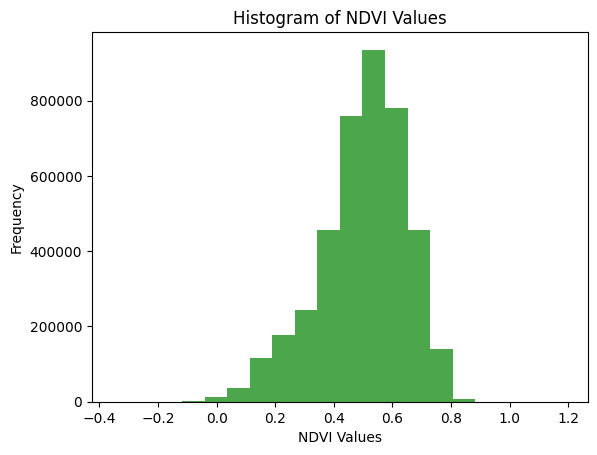

In [ ]:
import matplotlib.pyplot as plt

# Create a histogram of NDVI values
plt.hist(ndvi.ravel(), bins=20, color='green', alpha=0.7)
plt.xlabel('NDVI Values')
plt.ylabel('Frequency')
plt.title('Histogram of NDVI Values')
plt.show()


- The histogram visually represents the distribution of NDVI values across the dataset.

Here's a breakdown of what you can expect in the output:

- X-Axis: The x-axis of the histogram will represent different ranges of NDVI values. The bins parameter determines how many bins (intervals) the data will be divided into along the x-axis.

- Y-Axis: The y-axis of the histogram represents the frequency of NDVI values falling within each bin. The taller the bar, the more NDVI values there are in that specific range.

- Color and Transparency: The bars of the histogram will be colored green with a transparency level of 0.7, as specified by color='green' and alpha=0.7.

- Labels and Title: The x-axis label will be "NDVI Values," the y-axis label will be "Frequency," and the title of the plot will be "Histogram of NDVI Values."

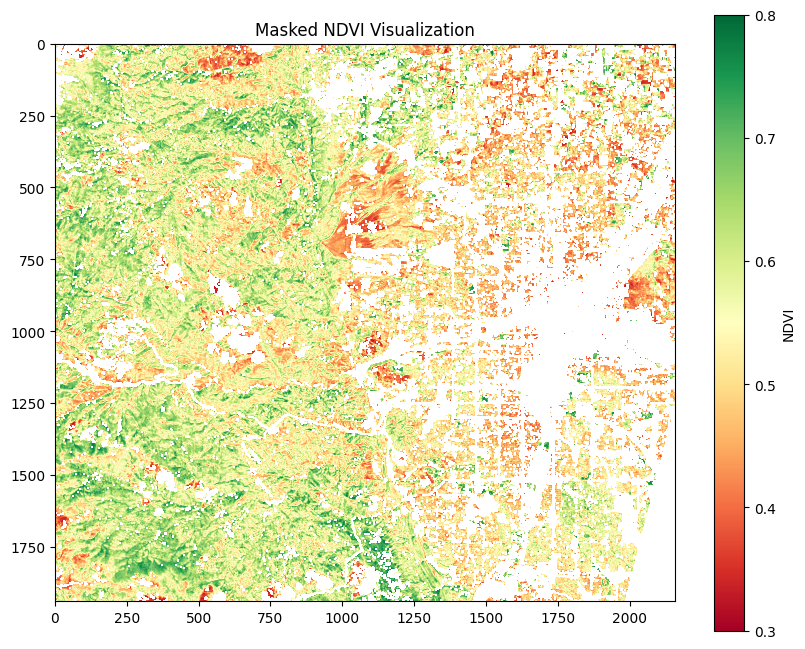

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# These lines import the numpy library as np and the matplotlib.pyplot module as plt. numpy is used for numerical operations, and matplotlib.pyplot is used for creating visualizations.

# Define a mask for NDVI values (e.g., focusing on healthy vegetation)
# Adjust the threshold values based on your analysis goals
lower_threshold = 0.3
upper_threshold = 0.8

# These lines set the lower and upper threshold values for the NDVI mask. The idea is to focus on NDVI values within this range, which typically represents healthy vegetation.

# Apply the mask to NDVI data
masked_ndvi = np.ma.masked_where((ndvi < lower_threshold) | (ndvi > upper_threshold), ndvi)

# This line uses np.ma.masked_where() from numpy.ma (masked array module) to apply a mask to the NDVI data (ndvi array).
# The mask is created using boolean conditions: (ndvi < lower_threshold) and (ndvi > upper_threshold). The | operator represents logical OR.
# Values in the ndvi array that satisfy the conditions (i.e., outside the specified range) are masked (hidden).

# Create a plot to visualize the masked NDVI data
plt.figure(figsize=(10, 8))
plt.imshow(masked_ndvi, cmap='RdYlGn', vmin=lower_threshold, vmax=upper_threshold)
# RdYlGn is a colormap abbreviation used in Matplotlib to specify a particular color map. It stands for "Red-Yellow-Green," which indicates the color gradient that the colormap represents.
plt.colorbar(label='NDVI')
plt.title('Masked NDVI Visualization')
plt.show()

# This block of code creates a plot to visualize the masked NDVI data.
# plt.figure(figsize=(10, 8)) sets the figure size for the plot.
# plt.imshow() displays the masked NDVI data as an image. The cmap parameter sets the color map, and vmin and vmax set the color scale limits.
# plt.colorbar(label='NDVI') adds a colorbar to the plot with the label "NDVI."
# plt.title('Masked NDVI Visualization') sets the plot title.
# plt.show() displays the plot.

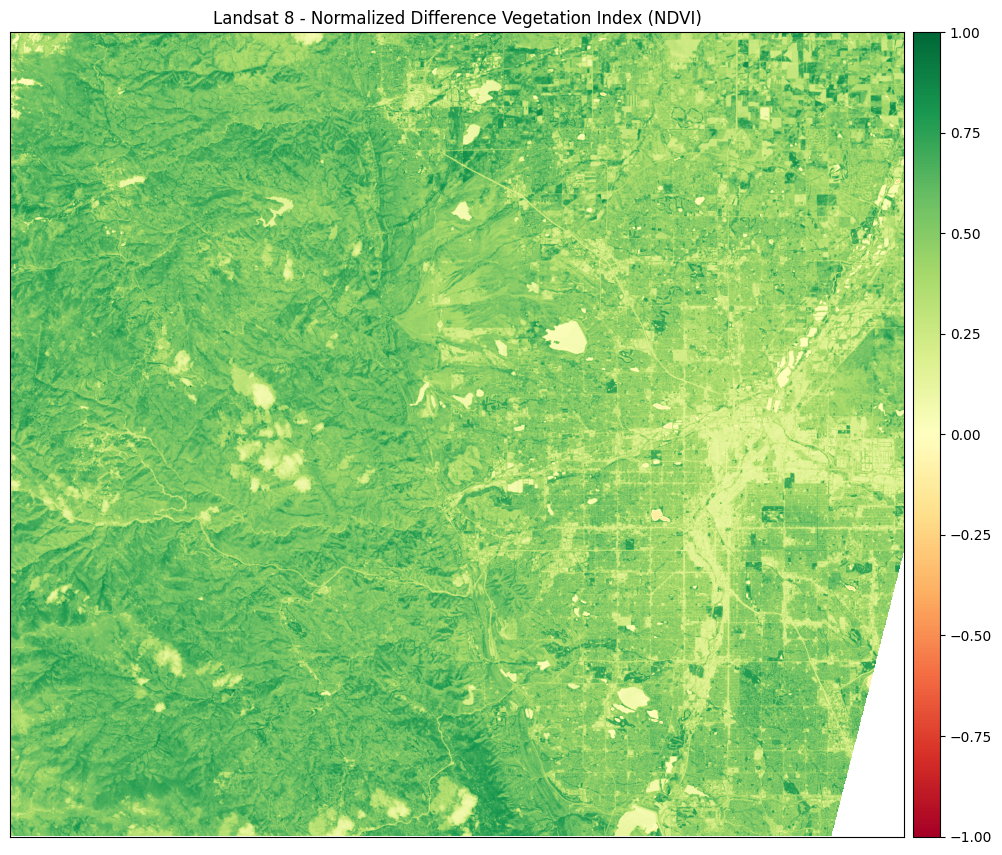

<Axes: title={'center': 'Landsat 8 - Normalized Difference Vegetation Index (NDVI)'}>

In [ ]:
titles = ["Landsat 8 - Normalized Difference Vegetation Index (NDVI)"]

# This line defines a list called titles containing a single string element, which is the title you want to display for the plot.

# Turn off bytescale scaling due to float values for NDVI
ep.plot_bands(ndvi, cmap="RdYlGn", cols=1, title=titles, vmin=-1, vmax=1)

# This line uses the ep.plot_bands() function from the earthpy.plot module to create the plot of NDVI data.
# ndvi: The NDVI array that you want to visualize.
# cmap="RdYlGn": Specifies the colormap to use for coloring the NDVI values. Here, it's using the "Red-Yellow-Green" colormap.
# cols=1: Specifies that you want to display the bands in a single column layout.
# title=titles: Sets the title of the plot using the titles list you defined earlier.
# vmin=-1 and vmax=1: These parameters set the color scale limits for the plot. NDVI values typically range from -1 to 1, so this ensures that the color map is applied correctly to the data.

<hr>

In [ ]:
!pip install rasterio

Website to download Tiff images : https://people.math.sc.edu/Burkardt/data/tif/tif.html

In [ ]:
"""import os
import rasterio

def extract_bands(tif_path, output_folder):
    # Open the TIFF file
    with rasterio.open(tif_path) as src:
        # Loop through each band in the raster
        for band_number in range(1, src.count + 1):
            # Read the band data
            band_data = src.read(band_number)

            # Create the output folder if it doesn't exist
            os.makedirs(output_folder, exist_ok=True)

            # Save each band to the output folder
            output_filename = os.path.join(output_folder, f'band_{band_number}.tif')
            with rasterio.open(output_filename, 'w', **src.profile) as dst:
                dst.write(band_data, 1)  # Write band data to the output file

    print("Bands extracted and saved.")

# Example usage
input_tif = '/content/drive/MyDrive/NDVI (Normalized Difference Vegetation Index) Project/TIFF Images/mountain.tif'
output_folder = '/content/drive/MyDrive/NDVI (Normalized Difference Vegetation Index) Project/TIFF Images'
extract_bands(input_tif, output_folder)"""


Bands extracted and saved.
